In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Reading CSV file
columns_name = [
    "time", "gender", "matric_%", "study_year","faculty","gpa_2023","accomodation","allowance","scholarship",
    "study_hours","party_week","drinks_night","missed_classes","Failed_classes","in_relationship","parent_approve","relation_parent"
]
student_dataa = pd.read_csv("survey_student.csv",names = columns_name, header =  0)


In [3]:
student_dataa

,time,gender,matric_%,study_year,faculty,gpa_2023,accomodation,allowance,scholarship,study_hours,party_week,drinks_night,missed_classes,Failed_classes,in_relationship,parent_approve,relation_parent
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,2024/03/12 11:05:33 am EET,Female,74.0,NaN,Science,NaN,Private accommodation/ stay with family/friends,NaN,No,3-5,3,1-3,0,0,No,Yes,Close
402,2024/03/12 3:26:14 pm EET,Female,73.0,2nd Year,Economic & Management Sciences,58.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,"Yes (NSFAS, etc...)",5-8,1,8+,0,0,Yes,Yes,Very close
403,2024/03/13 10:32:19 pm EET,Female,86.0,1st Year,NaN,NaN,Private accommodation/ stay with family/friends,R 4001- R 5000,No,5-8,2,3-5,1,0,No,Yes,Very close
404,2024/03/13 10:32:27 pm EET,Male,85.0,NaN,Economic & Management Sciences,NaN,Private accommodation/ stay with family/friends,R 4001- R 5000,No,1-3,4+,5-8,4+,0,No,Yes,Close


## Exploratory Data Analysis (EDA)

- basic information
- missing values
- numerical and categorical value
- visulization
- correlation, outliers

In [4]:
student_dataa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             406 non-null    object 
 1   gender           404 non-null    object 
 2   matric_%         399 non-null    float64
 3   study_year       333 non-null    object 
 4   faculty          399 non-null    object 
 5   gpa_2023         320 non-null    float64
 6   accomodation     383 non-null    object 
 7   allowance        375 non-null    object 
 8   scholarship      398 non-null    object 
 9   study_hours      403 non-null    object 
 10  party_week       404 non-null    object 
 11  drinks_night     404 non-null    object 
 12  missed_classes   403 non-null    object 
 13  Failed_classes   403 non-null    object 
 14  in_relationship  403 non-null    object 
 15  parent_approve   402 non-null    object 
 16  relation_parent  403 non-null    object 
dtypes: float64(2), o

In [5]:
student_dataa.isna().sum()

time                0
gender              2
matric_%            7
study_year         73
faculty             7
gpa_2023           86
accomodation       23
allowance          31
scholarship         8
study_hours         3
party_week          2
drinks_night        2
missed_classes      3
Failed_classes      3
in_relationship     3
parent_approve      4
relation_parent     3
dtype: int64

<Axes: >

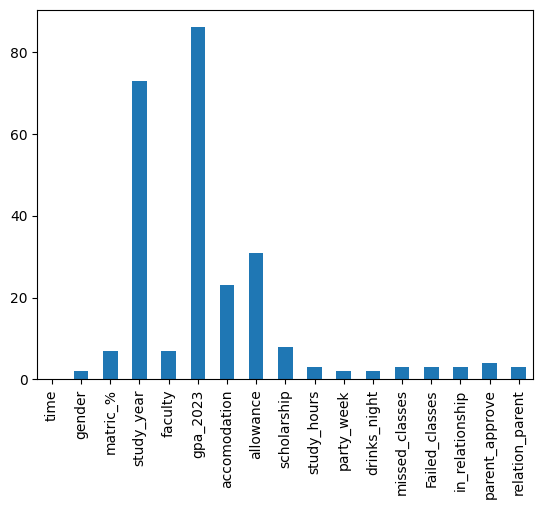

In [6]:
student_dataa.isna().sum().plot(kind="bar")

<Axes: >

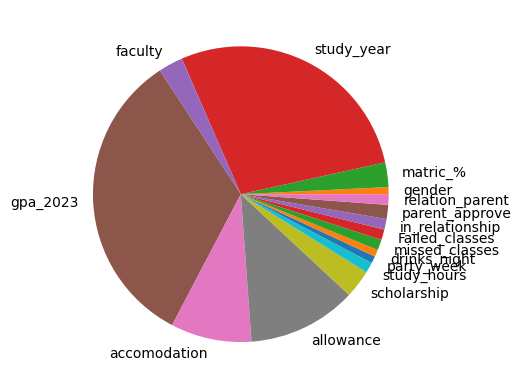

In [7]:
student_dataa.isna().sum().plot(kind="pie")

-- description --

in the above figure, amoung 17 columns null values are beeing counted. here the highst / greatest null value is of gpa whereas the least null value is timestamp with 0. others like degree allowanmce accomodation are also the highest null value holder and reast of them has minimal null data.

## Relationship with parent closeness and score gained

In [8]:
group_parent = student_dataa.groupby(by = "relation_parent")
info = group_parent[["matric_%"]].aggregate(("min","max","mean"))

In [9]:
info

matric_%                  
                     min    max       mean
relation_parent                           
Close               60.0  98.33  77.690000
Distant             85.0  98.00  91.500000
Fair                55.0  95.50  78.357143
Very close          34.0  99.00  77.960114

<Axes: xlabel='relation_parent'>

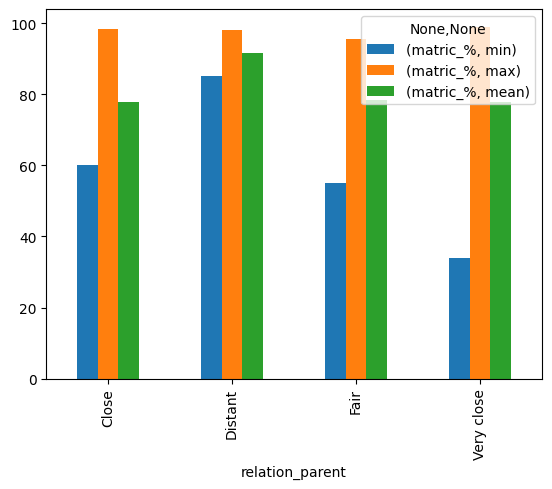

In [10]:
info.plot.bar()

In [11]:
group_parent = student_dataa.groupby(by = "faculty")
info = group_parent[["matric_%"]].aggregate(("min","max","mean"))
info

matric_%                 
                                    min   max       mean
faculty                                                 
AgriSciences                       66.0  86.0  74.772727
Arts & Social Sciences             60.0  85.0  75.969565
Economic & Management Sciences     34.0  99.0  76.977095
Education                          71.0  82.0  76.000000
Engineering                        73.0  98.0  83.691667
Law                                72.0  90.0  80.200000
Medicine and Health Services       73.0  85.0  79.888889
Science                            65.0  92.0  80.294727

In [12]:
group_parent = student_dataa.groupby(by = "relation_parent")
info = group_parent["drinks_night"].aggregate("count")

In [13]:
info

relation_parent
Close          97
Distant         2
Fair           35
Very close    269
Name: drinks_night, dtype: int64

<Axes: ylabel='drinks_night'>

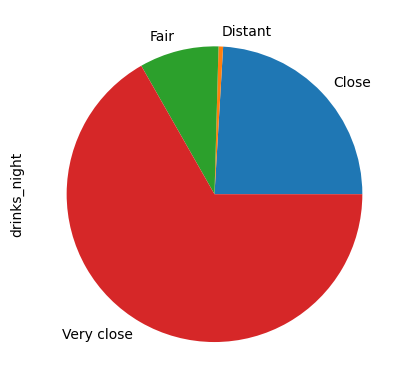

In [14]:
info.plot.pie()

<Axes: xlabel='None-None', ylabel='relation_parent'>

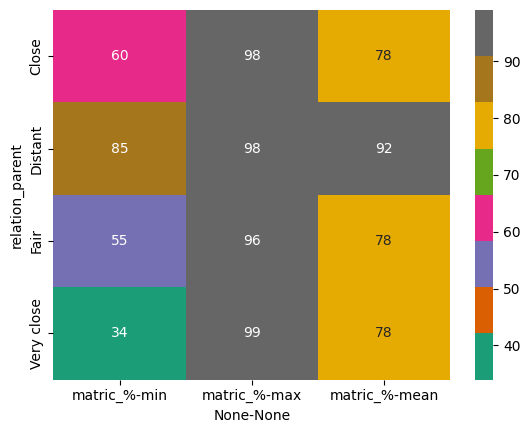

In [15]:
group_parent = student_dataa.groupby(by = "relation_parent")
info = group_parent[["matric_%"]].aggregate(("min","max","mean"))
sns.heatmap(info, annot=True, cmap="Dark2")

In [16]:
student_dataa.corr(numeric_only=True)

,matric_%,gpa_2023
matric_%,1.000000,0.299104
gpa_2023,0.299104,1.000000


In [18]:
group_parent = student_dataa.groupby(by= "faculty")
info = group_parent["gpa_2023"].aggregate("mean")

<Axes: xlabel='faculty'>

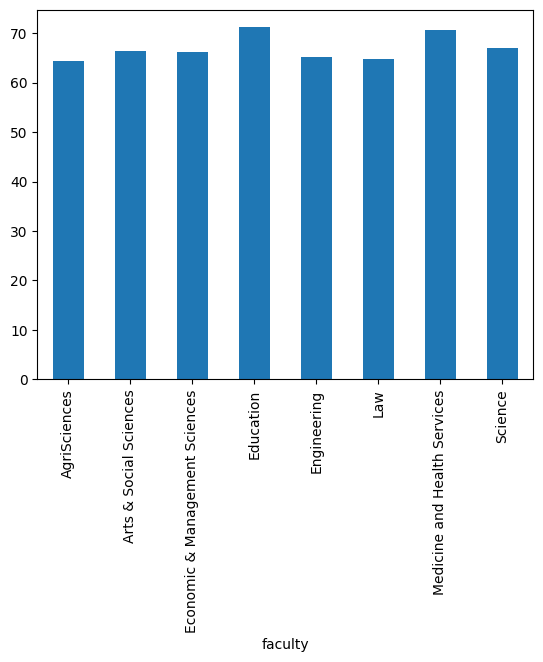

In [19]:
info.plot.bar()

<Axes: xlabel='matric_%', ylabel='gpa_2023'>

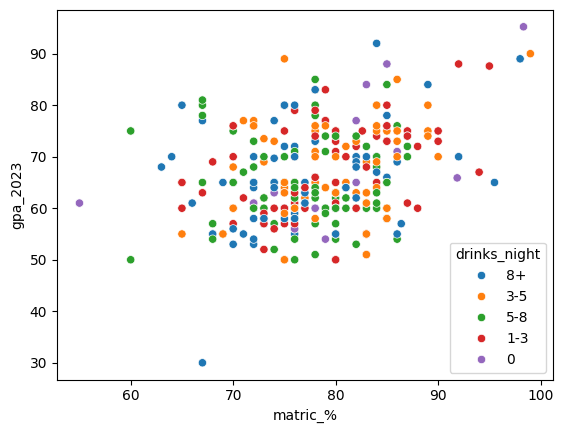

In [20]:
# Bubble Chart

sns.scatterplot(student_dataa,x = "matric_%", y = "gpa_2023", hue = "drinks_night")

In [21]:
group_parent = student_dataa.groupby(by= "relation_parent")
info = group_parent[["matric_%","gpa_2023"]].aggregate(('min','max','mean'))
info

matric_%                   gpa_2023                  
                     min    max       mean      min    max       mean
relation_parent                                                      
Close               60.0  98.33  77.690000     50.0  95.22  65.220769
Distant             85.0  98.00  91.500000     88.0  89.00  88.500000
Fair                55.0  95.50  78.357143     50.0  85.00  66.258065
Very close          34.0  99.00  77.960114     30.0  92.00  66.527356

<Axes: xlabel='relation_parent'>

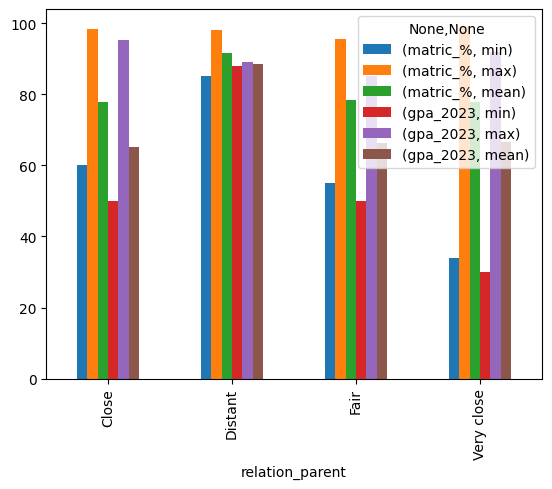

In [22]:
info.plot.bar()

<Axes: xlabel='gpa_2023', ylabel='gender'>

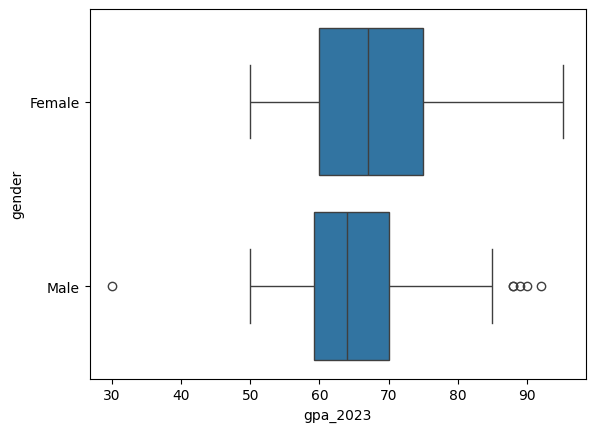

In [23]:
sns.boxplot(student_dataa, x = 'gpa_2023',y='gender')

In [26]:
student_dataa.corr(numeric_only=True)

,matric_%,gpa_2023
matric_%,1.000000,0.299104
gpa_2023,0.299104,1.000000
